# **Diabetes Prediction**

[Diabetes](https://www.who.int/news-room/fact-sheets/detail/diabetes#:~:text=Overview,hormone%20that%20regulates%20blood%20glucose.) is a chronic condition affecting the way the body converts food into energy, primarily classified into Type 1 and Type 2. Type 1 diabetes is characterized by deficient insulin production and reequires daily insulin injections for management. Type 2 diabetes, often linked to lifestyle factors, results from insulin resistance or the inability of the body to use insulin properly. This can lead to high levels of blood sugar if left untreated and can often be managed through diet, excercise, and medications. The number of people with diabetes has risen from 108 million in 1980 to 422 million in 2014, with the prevalance increasing more rapidly in low- and middle-income nations than in high-income nations. In 2019, diabetes and kidney disease due to diabetes caused an estimated 2 million deaths.

According to the [CDC](https://www.cdc.gov/diabetes/data-research/research/diabetes-screening-eligible.html#:~:text=More%20than%2020%25%20of%20Americans,t%20align%20with%20new%20guidelines.), more than 20% of Americans with diabetes don't know that have it and more than 80% of prediabetic Americans are not aware of their risk for type 2 diabetes. Due to the preventative nature of the disease, it is extremely important to have methodologies in place to ensure its effective detection and management early on. This project aims to efficiently and accurately predict the incidence of diabetes from patient data. It will include the training, analysis, and comparision of 5 types of machine learning algorithms: logistic regression, decision tree, random forest, extreme gradient boosting, and neural network multilayer perceptron.

This [dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) contains patient data, specifically 21 indicators/risk factors of diabetes, compiled from the [Behavioral Risk Factor Surveillance System (BRFSS)](https://www.cdc.gov/brfss/index.html), which is conducted annually by the CDC.

In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

### Loading Data

In [389]:
data = pd.read_csv('diabetesdata.csv')
print(data)

       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0 

### Preprocessing Data

In [392]:
class_names = ['Non-Diabetic', 'Diabetic']

In [257]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [428]:
data.duplicated().sum()

1635

In [430]:
data.drop_duplicates(inplace=True)

In [432]:
features = data.corr()['Diabetes_binary'].sort_values()
features

Income                 -0.212846
Education              -0.158522
PhysActivity           -0.150281
HvyAlcoholConsump      -0.098709
Veggies                -0.072181
Fruits                 -0.044560
AnyHealthcare           0.027034
NoDocbcCost             0.036145
Sex                     0.042538
Smoker                  0.075853
MentHlth                0.080688
CholCheck               0.118900
Stroke                  0.122727
PhysHlth                0.206868
HeartDiseaseorAttack    0.207229
DiffWalk                0.267082
Age                     0.274550
HighChol                0.281399
BMI                     0.285643
HighBP                  0.372048
GenHlth                 0.396571
Diabetes_binary         1.000000
Name: Diabetes_binary, dtype: float64

In [434]:
high_corr_features = features[features >= 0.2].index
high_corr_features

Index(['PhysHlth', 'HeartDiseaseorAttack', 'DiffWalk', 'Age', 'HighChol',
       'BMI', 'HighBP', 'GenHlth', 'Diabetes_binary'],
      dtype='object')

By mapping the correlations between all the features with diabetes incidence, the most relevent features can be identified to train the model as efficiently and accurately as possible.

In [259]:
print("Number of training examples/patients included in dataset:", len(data.axes[0]))

Number of training examples/patients included in dataset: 70692


### Visualizing Data

Number of patients without Diabetes: 35346
Number of patients diagnosed with Diabetes: 35346


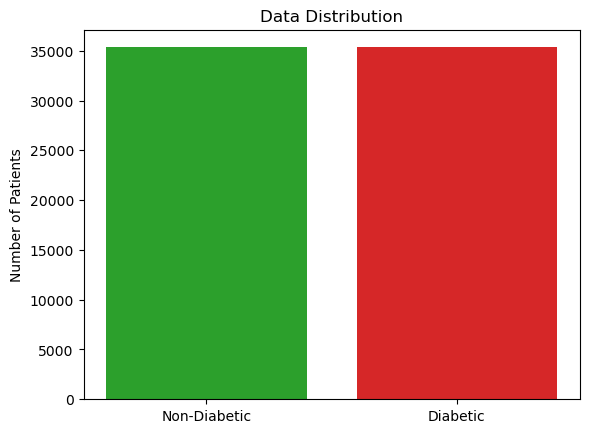

In [262]:
num_healthy = data['Diabetes_binary'].value_counts().get(0, 0) 
num_diabetic = data['Diabetes_binary'].value_counts().get(1, 0)
print("Number of patients without Diabetes:", num_healthy)
print("Number of patients diagnosed with Diabetes:", num_diabetic)
fig, ax = plt.subplots()

counts = [num_healthy, num_diabetic]
bar_colors = ['tab:green', 'tab:red']

ax.bar(class_names, counts, label=class_names, color=bar_colors)

ax.set_ylabel('Number of Patients')
ax.set_title('Data Distribution')

plt.show()

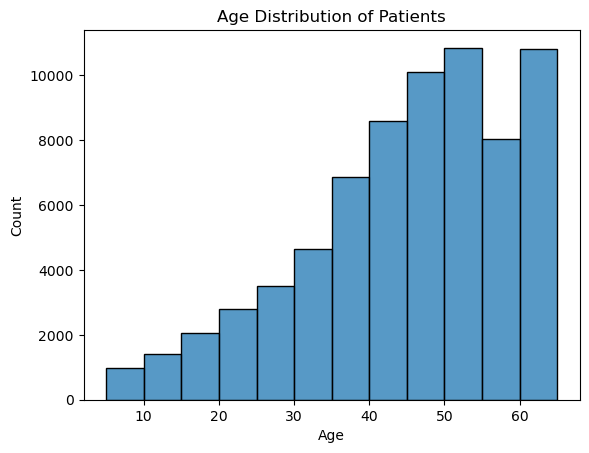

In [264]:
sns.histplot(data['Age']*5, bins=12)
plt.title('Age Distribution of Patients')
plt.show()

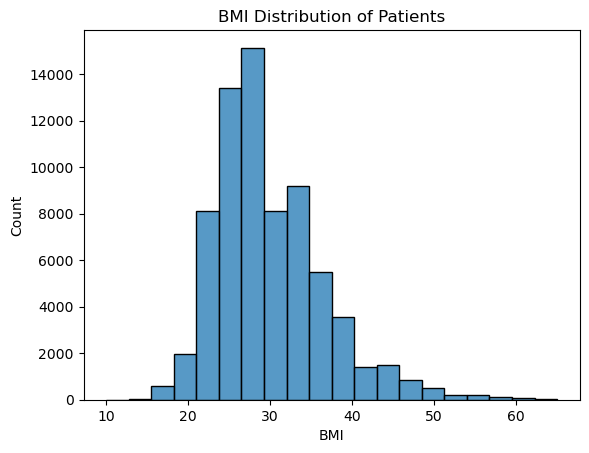

In [266]:
sns.histplot(data['BMI'], bins=20, binrange=(10, 65))
plt.title('BMI Distribution of Patients')
plt.show()

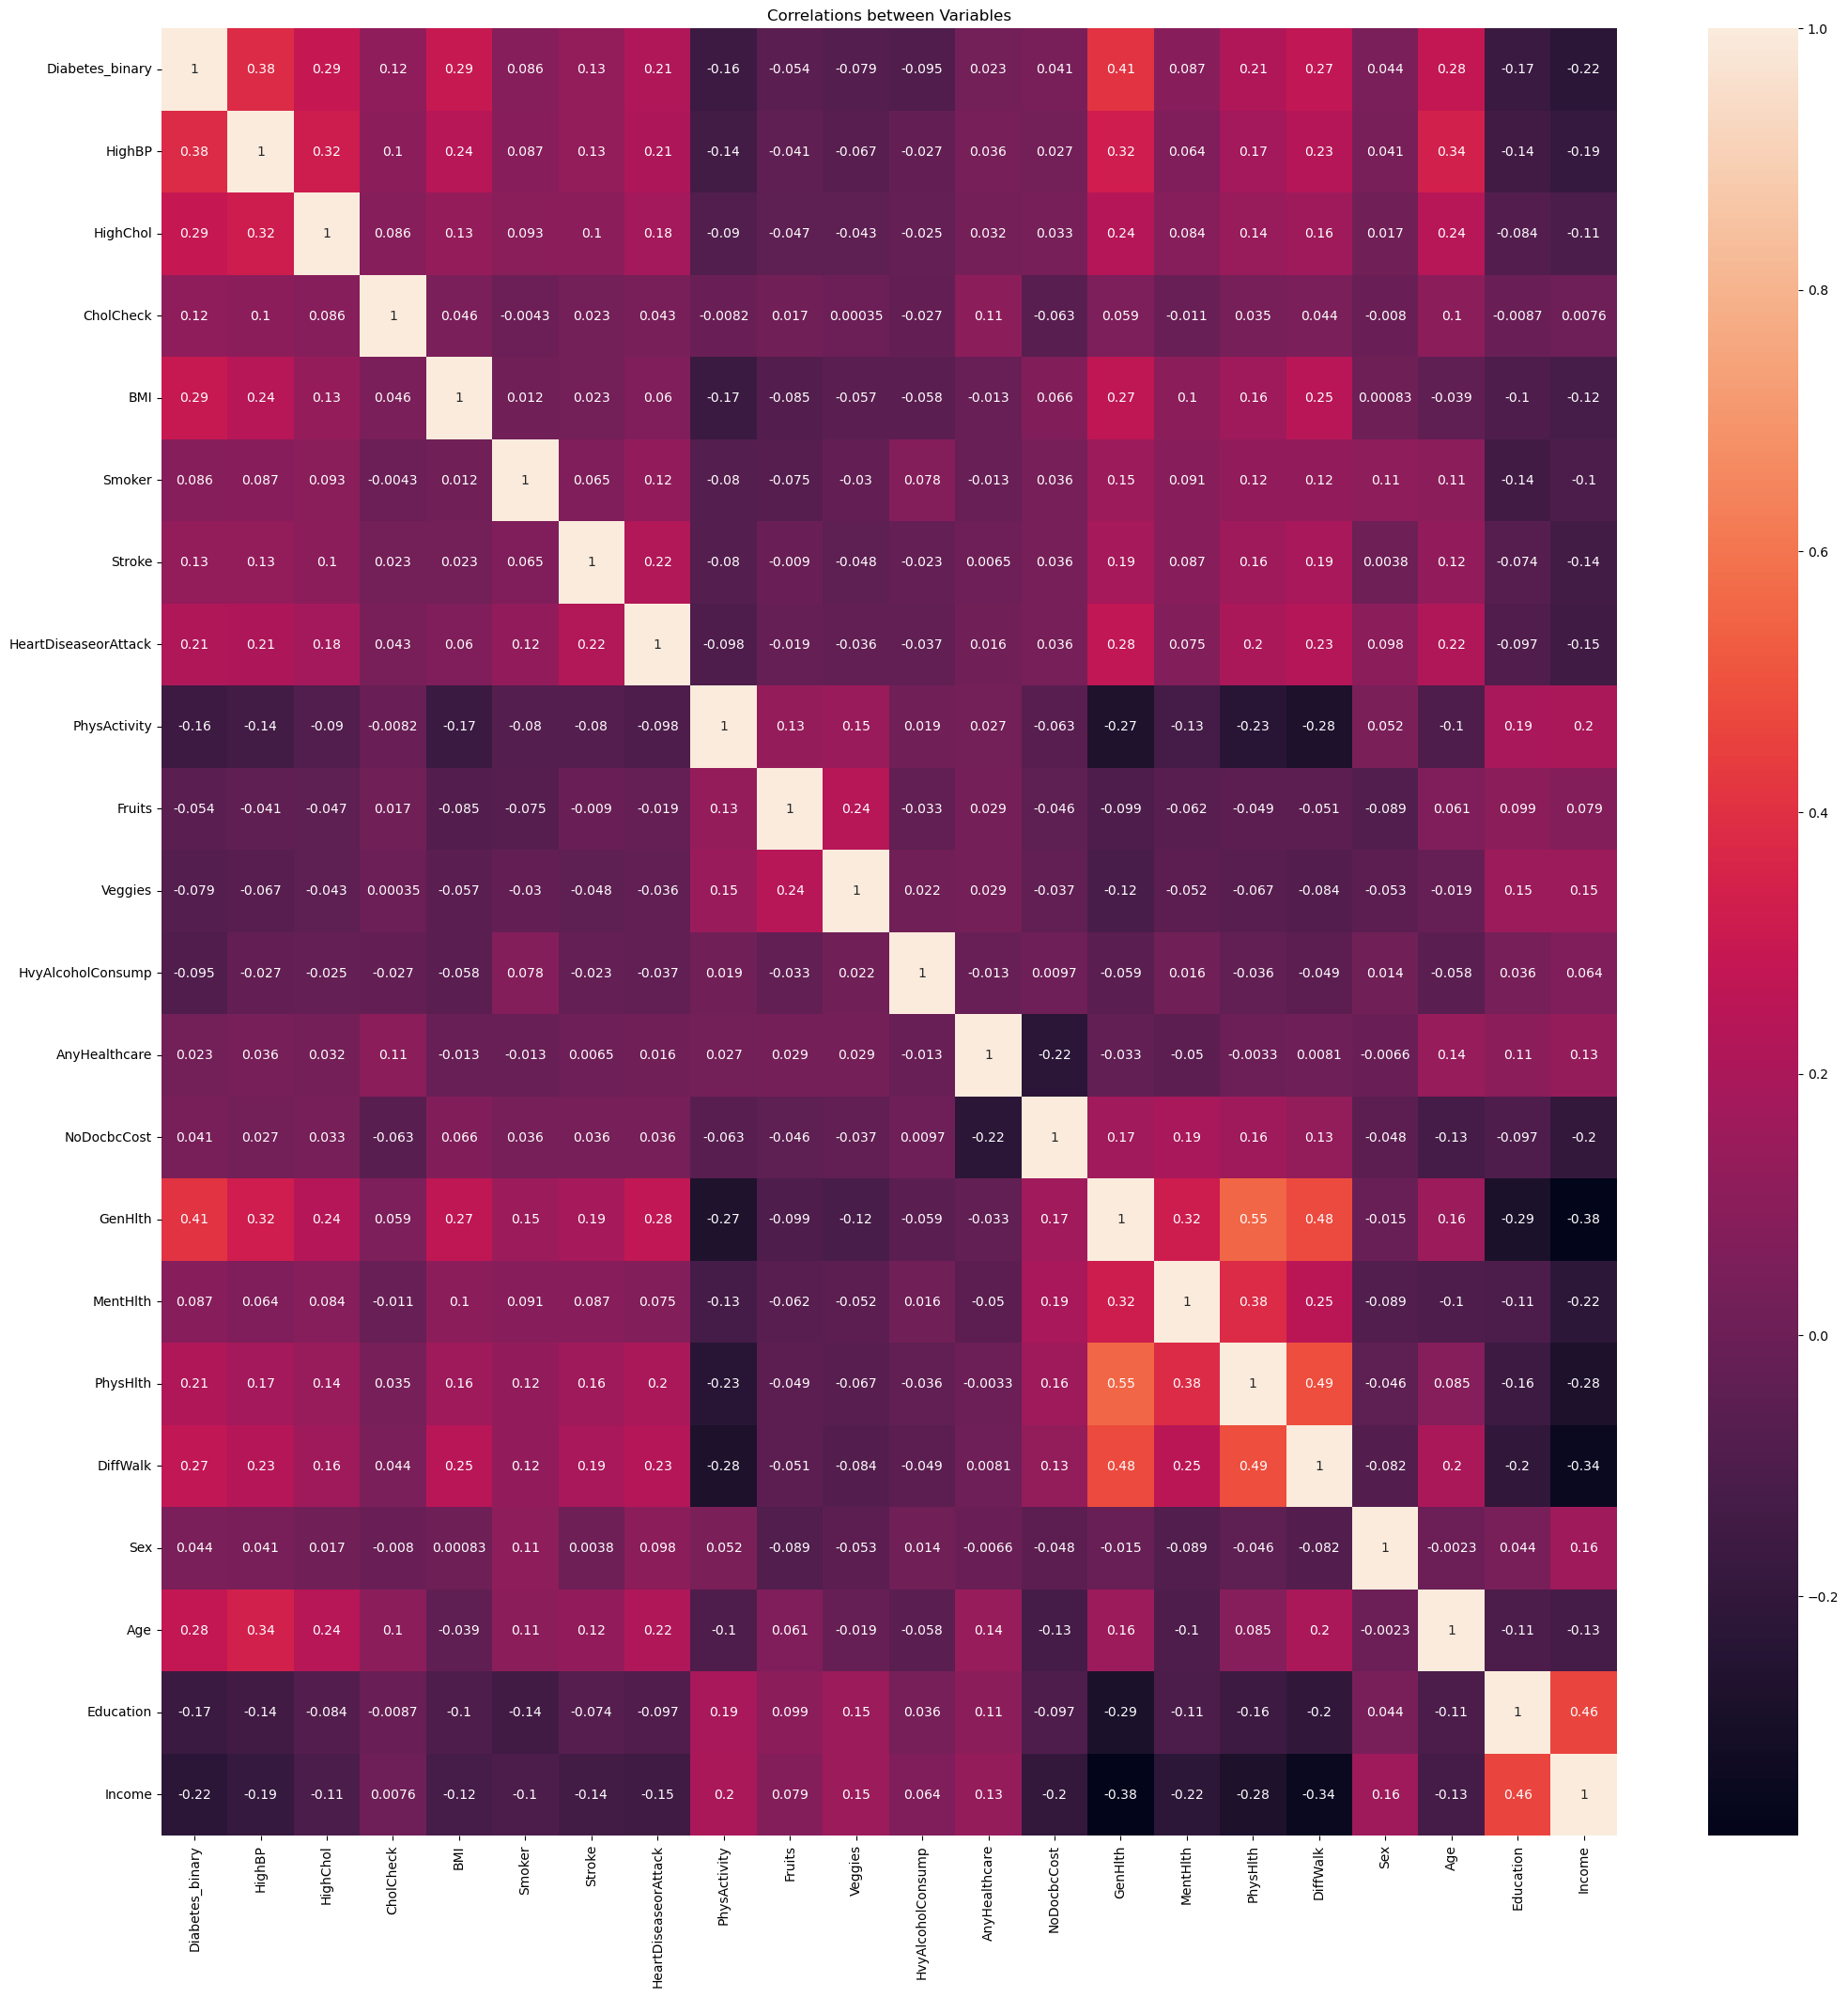

In [268]:
correlations = data.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(correlations, annot=True)
plt.title('Correlations between Variables')
plt.show()

Correlation Heatmap: this is a graphical tool which presents the correlations between all variables as a color-coded matrix.

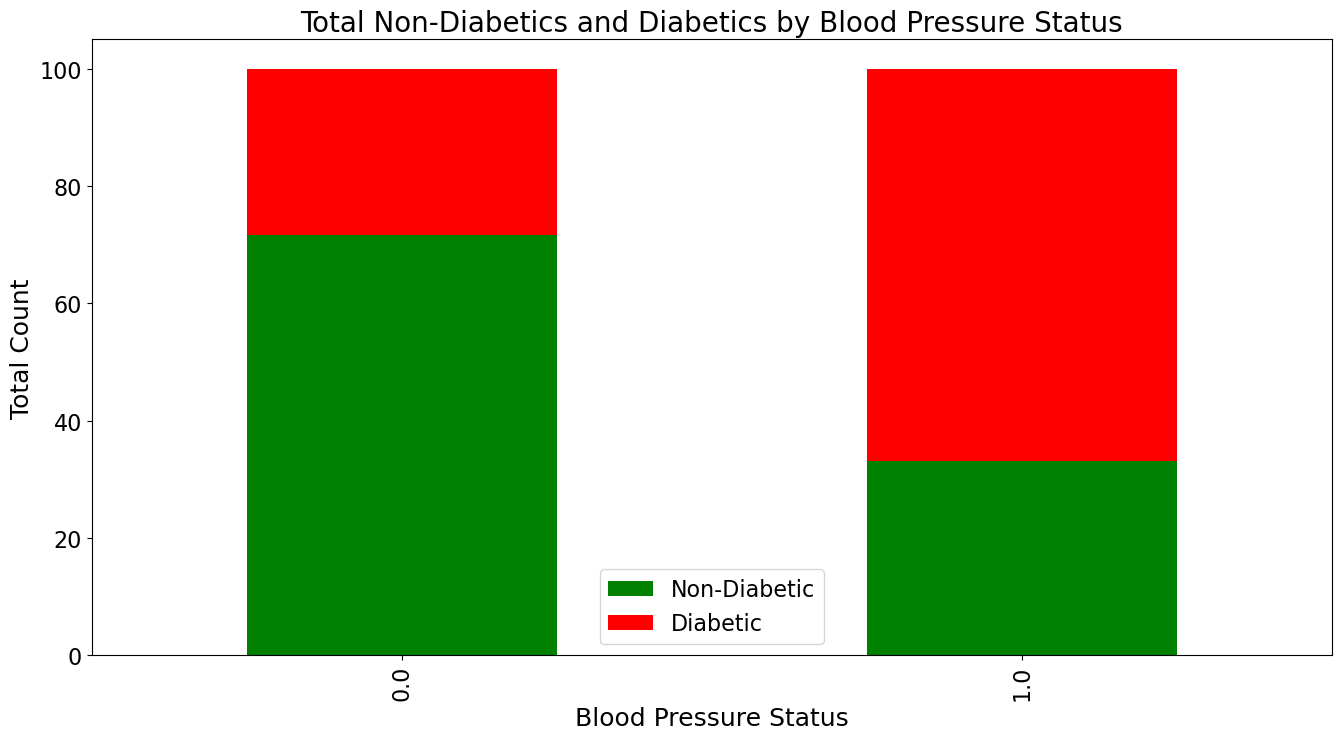

In [271]:
var='HighBP'
status_counts = data.groupby([var, 'Diabetes_binary'])['Diabetes_binary'].count().unstack(fill_value=0)
status_counts['Total'] = status_counts.sum(axis=1)
status_counts[0] = status_counts[0] / status_counts['Total'] * 100
status_counts[1] = status_counts[1] / status_counts['Total'] * 100
fig, ax = plt.subplots(figsize=(16, 8))
status_counts[[0, 1]].plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)
ax.set_title(f'Total Non-Diabetics and Diabetics by Blood Pressure Status', fontsize=20)
ax.set_xlabel('Blood Pressure Status', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18)
ax.legend(class_names, fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

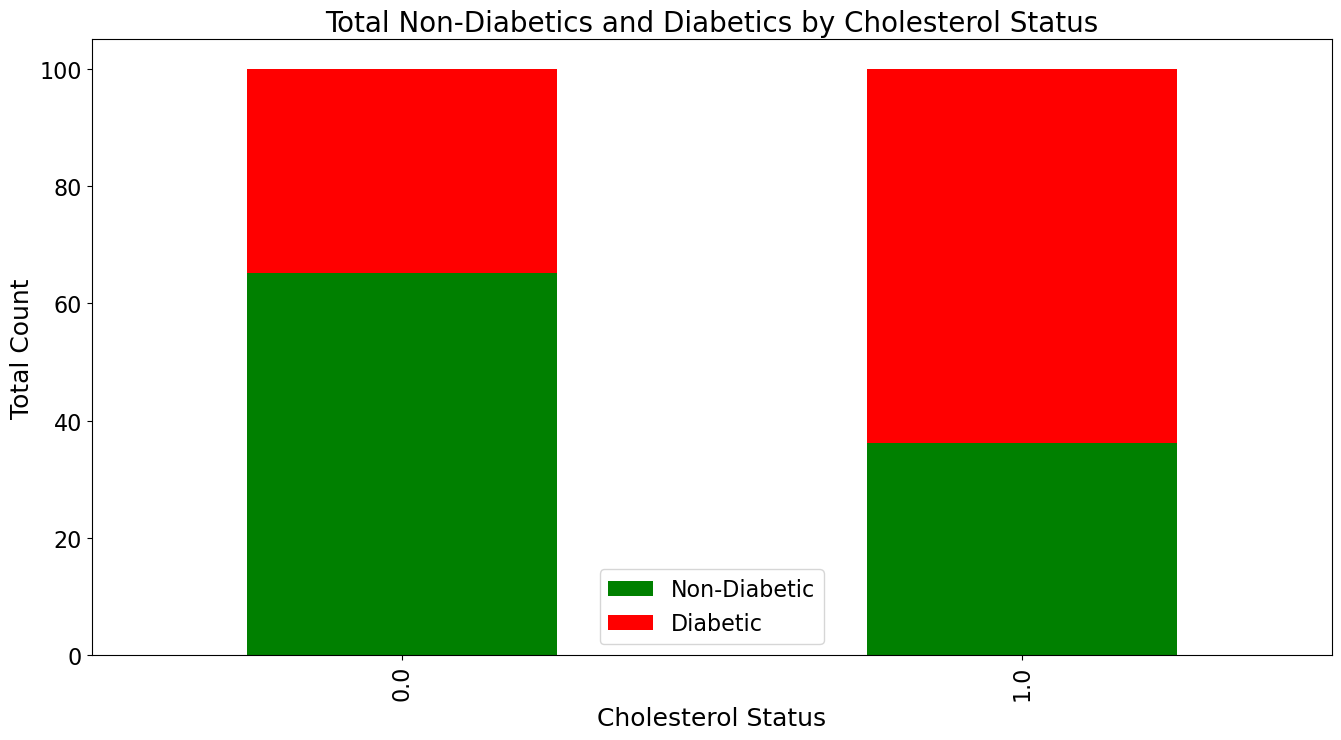

In [273]:
var='HighChol'
status_counts = data.groupby([var, 'Diabetes_binary'])['Diabetes_binary'].count().unstack(fill_value=0)
status_counts['Total'] = status_counts.sum(axis=1)
status_counts[0] = status_counts[0] / status_counts['Total'] * 100
status_counts[1] = status_counts[1] / status_counts['Total'] * 100
fig, ax = plt.subplots(figsize=(16, 8))
status_counts[[0, 1]].plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)
ax.set_title(f'Total Non-Diabetics and Diabetics by Cholesterol Status', fontsize=20)
ax.set_xlabel('Cholesterol Status', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18)
ax.legend(class_names, fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

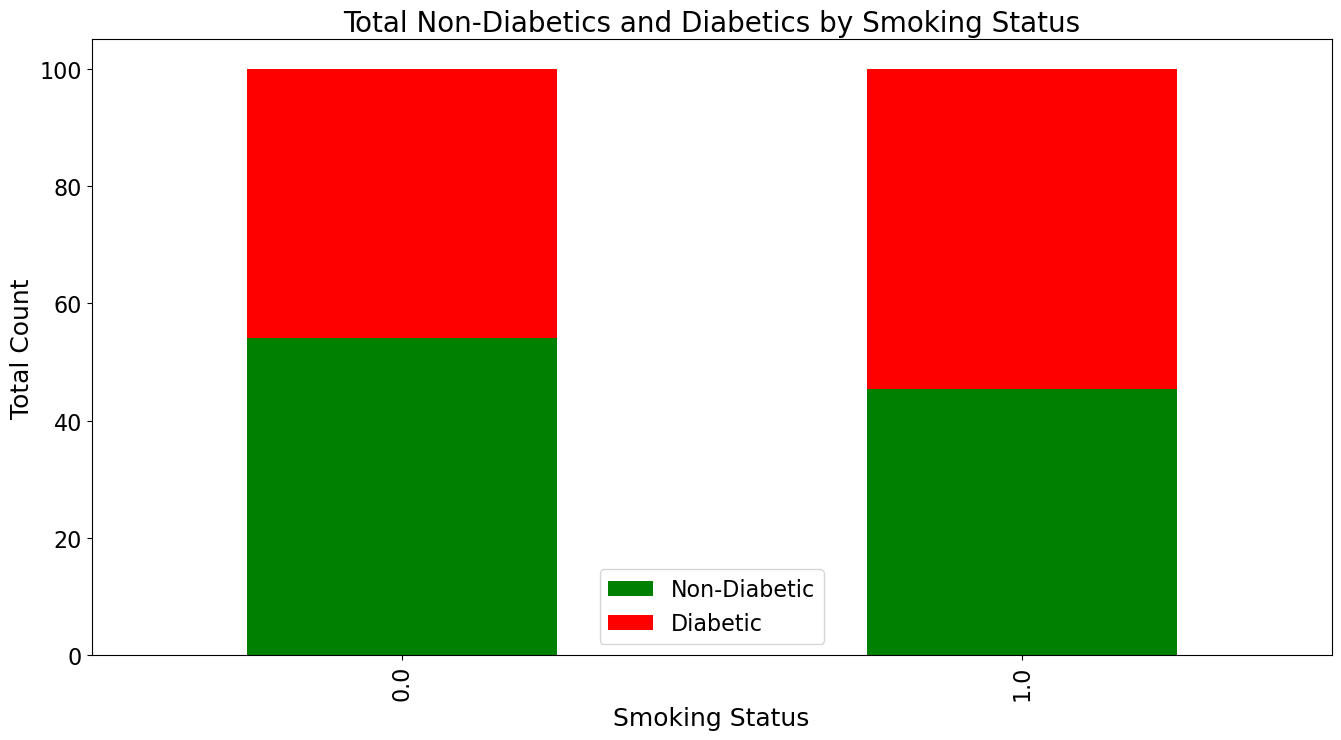

In [275]:
var='Smoker'
status_counts = data.groupby([var, 'Diabetes_binary'])['Diabetes_binary'].count().unstack(fill_value=0)
status_counts['Total'] = status_counts.sum(axis=1)
status_counts[0] = status_counts[0] / status_counts['Total'] * 100
status_counts[1] = status_counts[1] / status_counts['Total'] * 100
fig, ax = plt.subplots(figsize=(16, 8))
status_counts[[0, 1]].plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)
ax.set_title(f'Total Non-Diabetics and Diabetics by Smoking Status', fontsize=20)
ax.set_xlabel('Smoking Status', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18)
ax.legend(class_names, fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

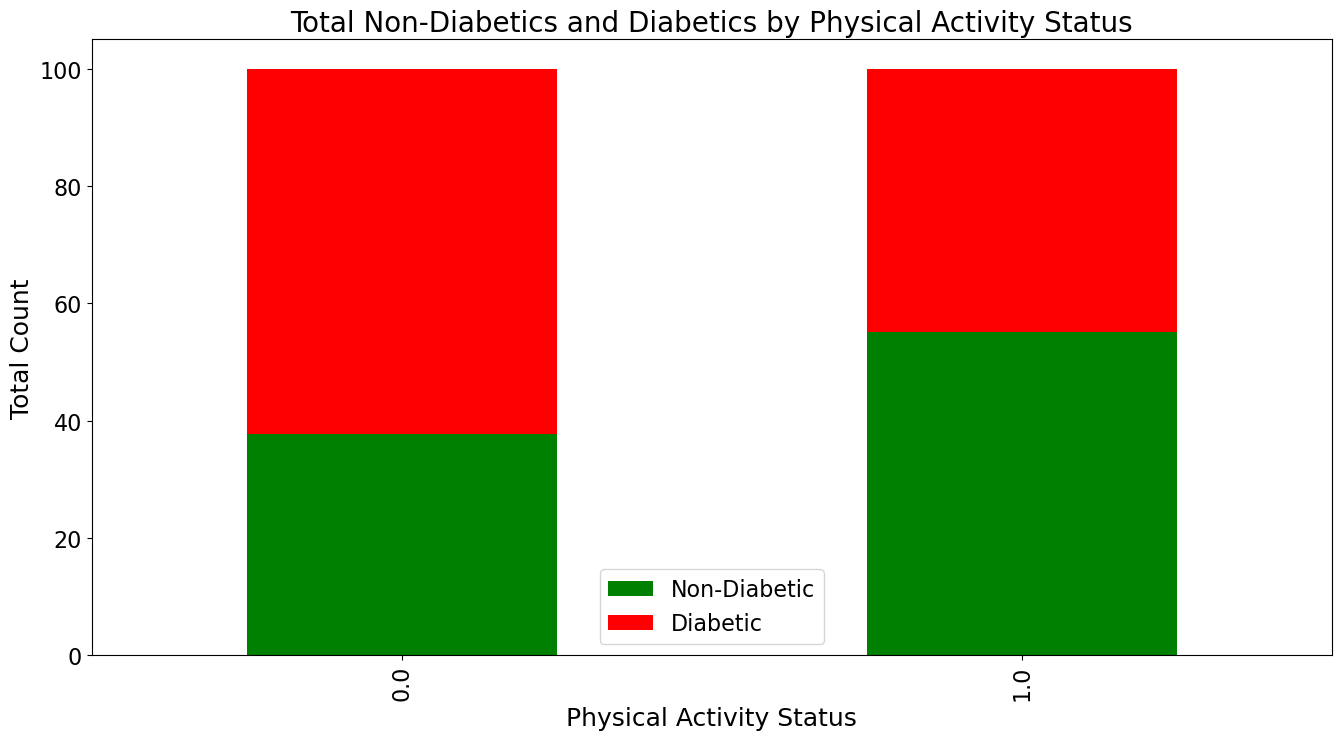

In [277]:
var='PhysActivity'
status_counts = data.groupby([var, 'Diabetes_binary'])['Diabetes_binary'].count().unstack(fill_value=0)
status_counts['Total'] = status_counts.sum(axis=1)
status_counts[0] = status_counts[0] / status_counts['Total'] * 100
status_counts[1] = status_counts[1] / status_counts['Total'] * 100
fig, ax = plt.subplots(figsize=(16, 8))
status_counts[[0, 1]].plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)
ax.set_title(f'Total Non-Diabetics and Diabetics by Physical Activity Status', fontsize=20)
ax.set_xlabel('Physical Activity Status', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18)
ax.legend(class_names, fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.show()

### Splitting Data

In [481]:
high_corr_features = ['HeartDiseaseorAttack', 'PhysHlth', 'DiffWalk', 'Age', 'HighChol',
       'BMI', 'HighBP', 'GenHlth', 'Diabetes_binary']
features = [x for x in data.columns if x in 'HeartDiseaseorAttack' or x in 'PhysHlth' or x in 'DiffWalk' or x in 'Age' or x in 'HighChol' or x in 'BMI' or x in 'HighBP' or x in 'GenHlth']

In [483]:
X_train, X_val, y_train, y_val = train_test_split(data[features], data['Diabetes_binary'], train_size = 0.8)

In [485]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 55245
validation samples: 13812
target proportion: 0.5093


Divides the images into 2 subsets:

Training set - used to train the models

Validation set - intermediary set used for fine-tuning the models and preventing overfitting; while training, it periodically helps assess how well the models generalize to data they haven't been trained on

### Logistic Regression Model

Logistic regression is a basic supervised machine learning algorithm typically used for binary classification tasks and utilizes the sigmoid activation function, which takes the independent variables as input and outputs a probability value between 0 and 1, denoting which of the target classes was predicted. A decision threshold, typically 0.5, is used to classify the outcome into one of the two classes.

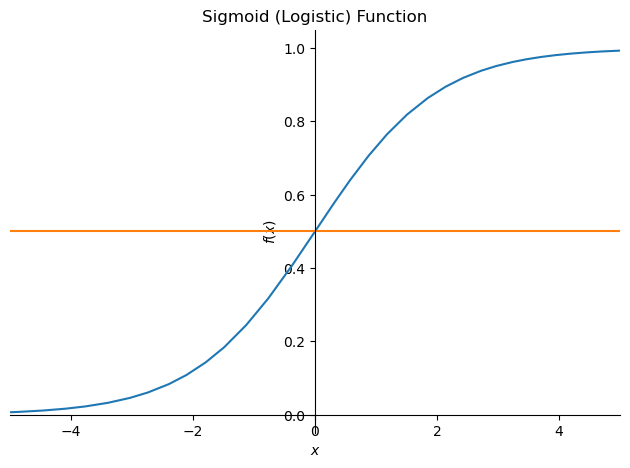

In [492]:
import sympy
sympy.plot("1/(1+exp(-x))", "0.5", xlim=(-5,5), title='Sigmoid (Logistic) Function');

In [494]:
from sklearn.linear_model import LogisticRegression

In [496]:
logistic_regression_model = LogisticRegression(max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [498]:
predictions = logistic_regression_model.predict(X_val)

In [500]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(logistic_regression_model.predict(X_train),y_train):.4f}")
logistic_regression_accuracy=accuracy_score(predictions,y_val)
logistic_regression_precision=precision_score(predictions,y_val)
logistic_regression_recall=recall_score(predictions,y_val)
logistic_regression_f1_score=f1_score(predictions,y_val)
logistic_regression_auc_score=roc_auc_score(predictions,y_val)
print(f"Metrics validation:\n\tAccuracy score: {logistic_regression_accuracy:.4f}")
print(f"\tPrecision: {logistic_regression_precision:.4f}")
print(f"\tRecall: {logistic_regression_recall:.4f}")
print(f"\tF1 score: {logistic_regression_f1_score:.4f}")
print(f"\tAUC score: {logistic_regression_auc_score:.4f}")

Metrics train:
	Accuracy score: 0.7395
Metrics validation:
	Accuracy score: 0.7465
	Precision: 0.7786
	Recall: 0.7342
	F1 score: 0.7558
	AUC score: 0.7473


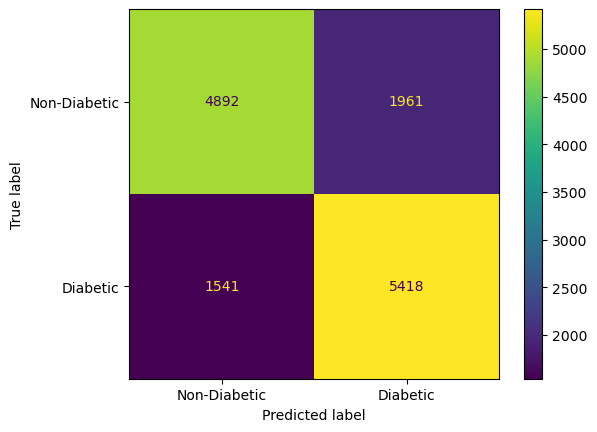

In [502]:
cm=confusion_matrix(y_true=y_val, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

Confusion Matrix: also known as an error matrix, a matrix representation of model testing results allowing for the identification of classes that the algorithm is 'confusing' or misidentifying for another class(es).

### Decision Tree Model

Decision Tree classification is a supervised machine learning algorithm with works by recursively splitting the dataset into subsets based on the value of input-features, forming a tree-like structure. its components include the root node, which includes the entire dataset, decision nodes, which are the splits in the tree, and leaf nodes, which are the model's predictions. At every node, the algorithm selects the best feature to split the data and continues splitting recursively until a stopping criterion is met. Critiera used to decide which features to split on include Gini impurity and information gain.

In [507]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [509]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

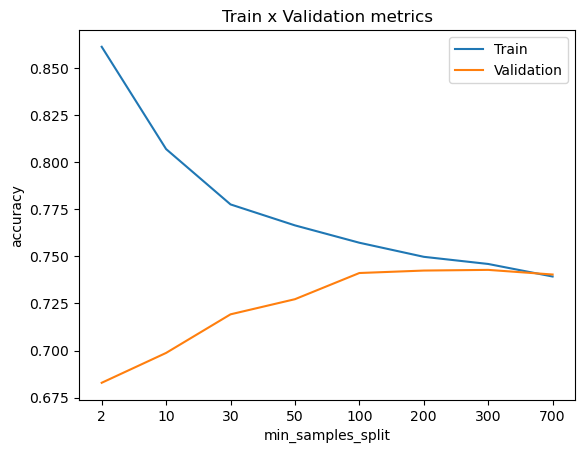

In [511]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

min_samples_split is a parameter of the decision tree algorithm and denotes the minimum number of samples required to split an internal node. Based on this graph, the optimal parameter value to use for this data seems to be 300 samples.

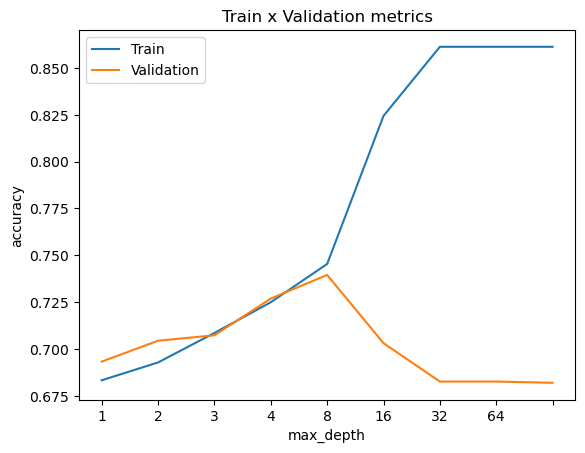

In [514]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Max depth is a parameter of the decision tree algorithm and denotes the maximum depth at which the tree needs to stop splitting. Based on this graph, the optimal parameter value to use for this data seems to be 8 nodes.

In [517]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 300, max_depth = 8).fit(X_train,y_train)

In [519]:
predictions = decision_tree_model.predict(X_val)

In [521]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
decision_tree_accuracy=accuracy_score(predictions,y_val)
decision_tree_precision=precision_score(predictions,y_val)
decision_tree_recall=recall_score(predictions,y_val)
decision_tree_f1_score=f1_score(predictions,y_val)
decision_tree_auc_score=roc_auc_score(predictions,y_val)
print(f"Metrics validation:\n\tAccuracy score: {decision_tree_accuracy:.4f}")
print(f"\tPrecision: {decision_tree_precision:.4f}")
print(f"\tRecall: {decision_tree_recall:.4f}")
print(f"\tF1 score: {decision_tree_f1_score:.4f}")
print(f"\tAUC score: {decision_tree_auc_score:.4f}")

Metrics train:
	Accuracy score: 0.7427
Metrics validation:
	Accuracy score: 0.7389
	Precision: 0.7886
	Recall: 0.7199
	F1 score: 0.7527
	AUC score: 0.7411


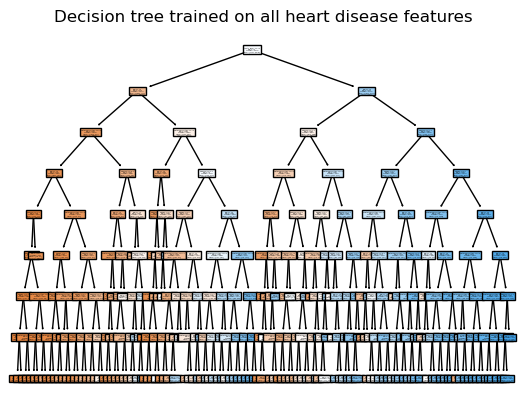

In [523]:
plt.figure()
plot_tree(decision_tree_model, filled=True, class_names=class_names, feature_names=list(data))
plt.title("Decision tree trained on all heart disease features")
plt.show()

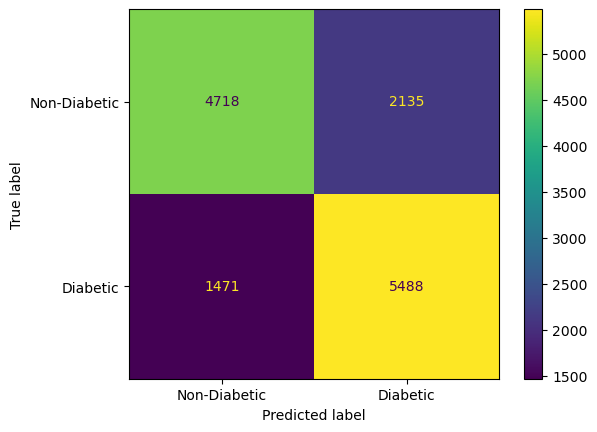

In [524]:
cm=confusion_matrix(y_true=y_val, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

### Random Forest Model

Random Forest Classification is an ensemble learning method which constructs multiple decision trees during training and merges their outputs to make the final prediction. It is generally much more accurate and robust than individual decision trees.

In [527]:
from sklearn.ensemble import RandomForestClassifier

In [528]:
n_estimators_list = [10,50,100,500]

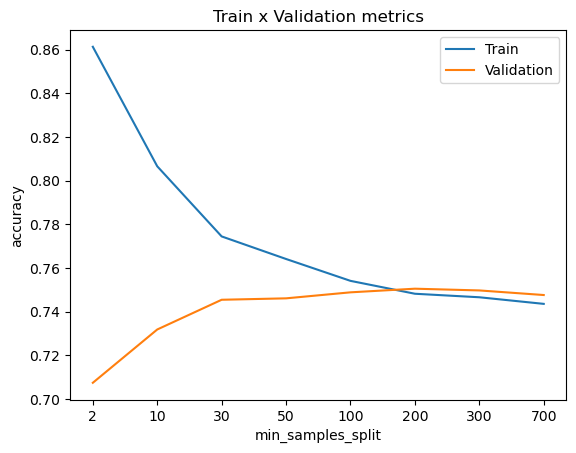

In [529]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Based on the graph, the optimal min_samples_split value to use for this data seems to be 200 samples.

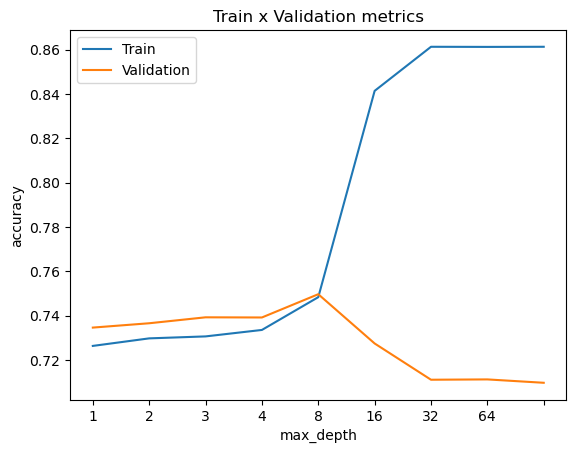

In [536]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Based on the graph, the optimal max_depth value to use for this data seems to be 8 nodes.

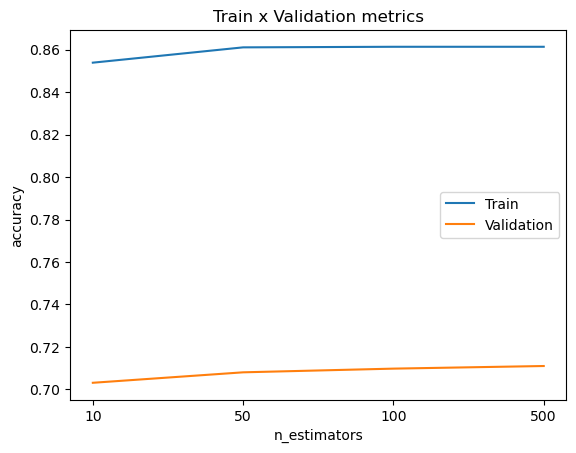

In [541]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_val) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Number of estimators(n_estimators) is a parameter of the decision tree algorithm and denotes number of decision trees in the forest. Based on this graph, the optimal parameter value to use for this data seems to be 100 trees.

In [545]:
random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 8, min_samples_split = 200).fit(X_train,y_train)

In [546]:
predictions = random_forest_model.predict(X_val)

In [547]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(predictions,y_val):.4f}")
random_forest_accuracy=accuracy_score(predictions,y_val)
random_forest_precision=precision_score(predictions,y_val)
random_forest_recall=recall_score(predictions,y_val)
random_forest_f1_score=f1_score(predictions,y_val)
random_forest_auc_score=roc_auc_score(predictions,y_val)
print(f"Metrics validation:\n\tAccuracy score: {random_forest_accuracy:.4f}")
print(f"\tPrecision: {random_forest_precision:.4f}")
print(f"\tRecall: {random_forest_recall:.4f}")
print(f"\tF1 score: {random_forest_f1_score:.4f}")
print(f"\tAUC score: {random_forest_auc_score:.4f}")

Metrics train:
	Accuracy score: 0.7458
Metrics test:
	Accuracy score: 0.7501
Metrics validation:
	Accuracy score: 0.7501
	Precision: 0.8080
	Recall: 0.7267
	F1 score: 0.7652
	AUC score: 0.7534


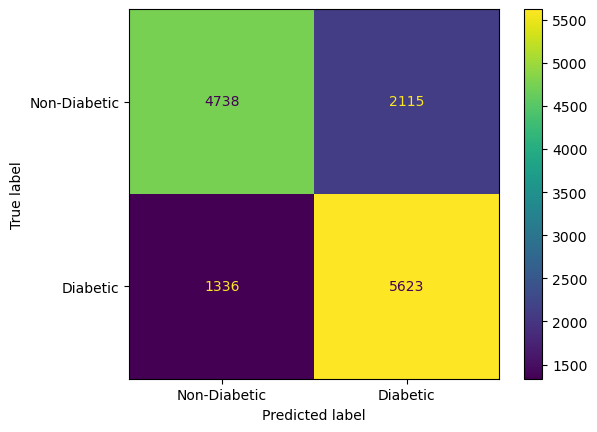

In [551]:
cm=confusion_matrix(y_true=y_val, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

### XGBoost Model

XGBoost(Extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm with builds an ensemble of decision trees in a sequential manner to optimize performance. The Boosting algorithm sequentially adds new trees that correct errors made by previous trees and gradient boosing uses gradients/erros of the loss function to build new trees that focus on hard-to-classify examples. These models are typically more efficient, accurate, and flexible than random forest classifiers.

In [555]:
from xgboost import XGBClassifier

In [557]:
n = int(len(X_train)*0.8)

In [559]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [561]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.66613
[1]	validation_0-logloss:0.64404
[2]	validation_0-logloss:0.62577
[3]	validation_0-logloss:0.61060
[4]	validation_0-logloss:0.59763
[5]	validation_0-logloss:0.58674
[6]	validation_0-logloss:0.57766
[7]	validation_0-logloss:0.56991
[8]	validation_0-logloss:0.56303
[9]	validation_0-logloss:0.55721
[10]	validation_0-logloss:0.55222
[11]	validation_0-logloss:0.54806
[12]	validation_0-logloss:0.54457
[13]	validation_0-logloss:0.54130
[14]	validation_0-logloss:0.53851
[15]	validation_0-logloss:0.53623
[16]	validation_0-logloss:0.53404
[17]	validation_0-logloss:0.53246
[18]	validation_0-logloss:0.53093
[19]	validation_0-logloss:0.52957
[20]	validation_0-logloss:0.52839
[21]	validation_0-logloss:0.52731
[22]	validation_0-logloss:0.52641
[23]	validation_0-logloss:0.52574
[24]	validation_0-logloss:0.52509
[25]	validation_0-logloss:0.52450
[26]	validation_0-logloss:0.52409
[27]	validation_0-logloss:0.52363
[28]	validation_0-logloss:0.52343
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [563]:
xgb_model.best_iteration

58

In [565]:
predictions = xgb_model.predict(X_val)

In [567]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(predictions,y_val):.4f}")
xgb_accuracy=accuracy_score(predictions,y_val)
xgb_precision=precision_score(predictions,y_val)
xgb_recall=recall_score(predictions,y_val)
xgb_f1_score=f1_score(predictions,y_val)
xgb_auc_score=roc_auc_score(predictions,y_val)
print(f"Metrics validation:\n\tAccuracy score: {xgb_accuracy:.4f}")
print(f"\tPrecision: {xgb_precision:.4f}")
print(f"\tRecall: {xgb_recall:.4f}")
print(f"\tF1 score: {xgb_f1_score:.4f}")
print(f"\tAUC score: {xgb_auc_score:.4f}")

Metrics train:
	Accuracy score: 0.7497
Metrics test:
	Accuracy score: 0.7474
Metrics validation:
	Accuracy score: 0.7474
	Precision: 0.8073
	Recall: 0.7234
	F1 score: 0.7631
	AUC score: 0.7508


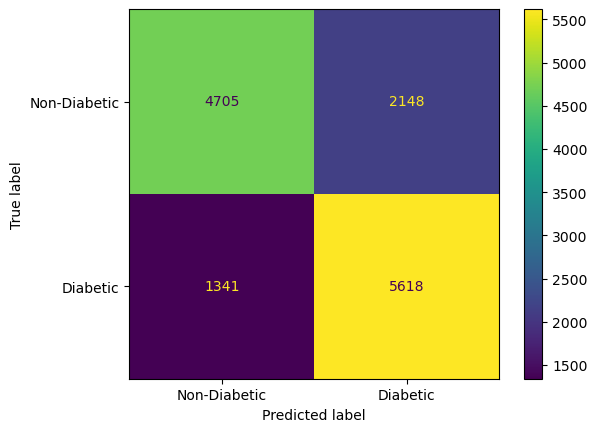

In [569]:
cm=confusion_matrix(y_true=y_val, y_pred=predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

### Neural Network Model

Neural networks are a powerful class of machine learning algorithms consisting of interconnected layers of nodes/neurons that work together to recognize patterns and make predictions.

In [639]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler

In [641]:
features = [x for x in data.columns if x not in 'Diabetes_binary']
X_train, X_temp, y_train, y_temp = train_test_split(data[features], data['Diabetes_binary'], test_size=0.3, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=10)

In [643]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

This standard scaler standardizes the features of the dataset by removing the mean and scaling to unit variance, enruing that each feature contributes equally to the model's convergance. The standardiation transforms the data so it has a mean of 0 and a standard deviation of 1.

In [646]:
nn_model = Sequential([
Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(l=0.1)),
Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.1)),
Dense(16, activation='relu'),
Dense(1, activation='sigmoid')
])

Dense Layers: regular neural network layer; 'dense' because each of its neurons are connected to every single neuron of the previous layer

Rectified Linear Unit (ReLU) Activation Function: piecewise linear function which directly outputs positive inputs and outputs zero for any non positive inputs( f(x) = max(0, x) ) 

Sigmoid Activation Function: also referred to as the logistic function, maps input values in binary classification tasks to an output range between 0 and 1; a decision threshold, typically 0.5, is used to classify the outcome into one of the two classes.

In [651]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

The Adam Optimizer, short for 'Adaptive Moment Estimation' is an iterative optimization algorithm which continously customizes the learning rate of each parameter based on its gradient history, allowing the algorithm to adapt as training progresses.

In [654]:
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                1408      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 16)                528       
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4033 (15.75 KB)
Trainable params: 4033 (15.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


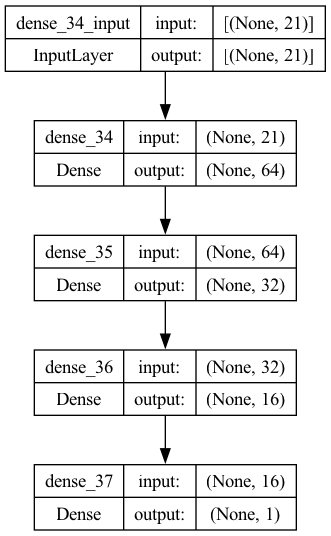

In [656]:
tf.keras.utils.plot_model(
    nn_model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [658]:
my_callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
num_epochs=50
history = nn_model.fit(X_train_scaled, y_train, epochs=num_epochs, validation_data=(X_val_scaled, y_val), callbacks=my_callbacks)

Epoch 1/50
1511/1511 [==============================] - 1s 555us/step - loss: 0.9490 - accuracy: 0.7319 - val_loss: 0.5407 - val_accuracy: 0.7440
Epoch 2/50
1511/1511 [==============================] - 1s 482us/step - loss: 0.5433 - accuracy: 0.7408 - val_loss: 0.5348 - val_accuracy: 0.7469
Epoch 3/50
1511/1511 [==============================] - 1s 469us/step - loss: 0.5393 - accuracy: 0.7405 - val_loss: 0.5297 - val_accuracy: 0.7467
Epoch 4/50
1511/1511 [==============================] - 1s 470us/step - loss: 0.5355 - accuracy: 0.7432 - val_loss: 0.5298 - val_accuracy: 0.7480
Epoch 5/50
1511/1511 [==============================] - 1s 470us/step - loss: 0.5346 - accuracy: 0.7428 - val_loss: 0.5286 - val_accuracy: 0.7467
Epoch 6/50
1511/1511 [==============================] - 1s 446us/step - loss: 0.5325 - accuracy: 0.7438 - val_loss: 0.5270 - val_accuracy: 0.7468
Epoch 7/50
1511/1511 [==============================] - 1s 528us/step - loss: 0.5306 - accuracy: 0.7434 - val_loss: 0.5300 -

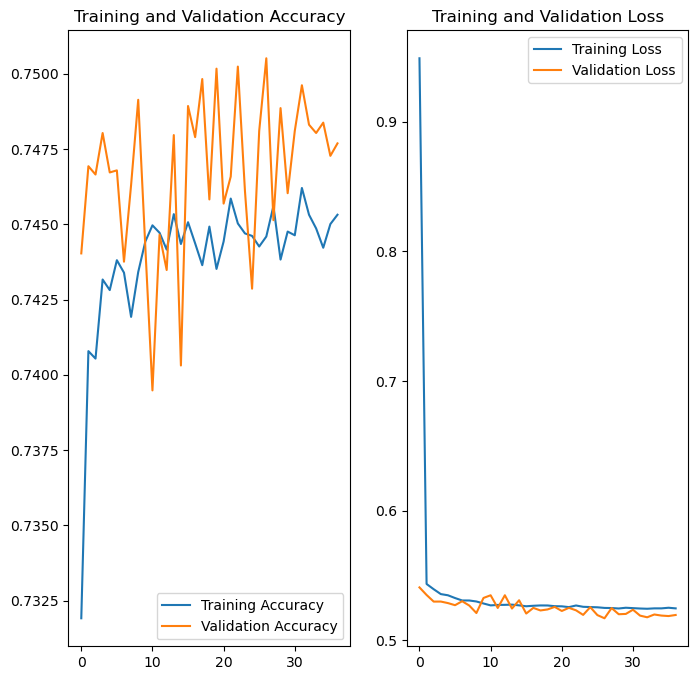

In [659]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [660]:
predictions = (nn_model.predict(X_test_scaled) > 0.5).astype(int)

195/195 [==============================] - 0s 315us/step


In [661]:
cm=confusion_matrix(y_true=y_test, y_pred=predictions)

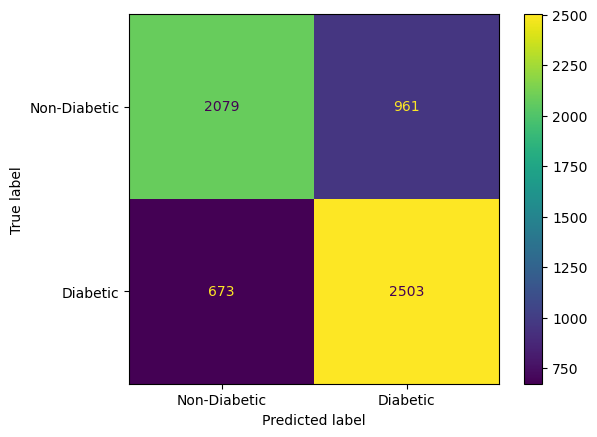

In [662]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

In [663]:
cr=classification_report(y_test, predictions, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

Non-Diabetic       0.76      0.68      0.72      3040
    Diabetic       0.72      0.79      0.75      3176

    accuracy                           0.74      6216
   macro avg       0.74      0.74      0.74      6216
weighted avg       0.74      0.74      0.74      6216



In [664]:
nn_accuracy=accuracy_score(predictions,y_test)
nn_precision=precision_score(predictions,y_test)
nn_recall=recall_score(predictions,y_test)
nn_f1_score=f1_score(predictions,y_test)
nn_auc_score=roc_auc_score(predictions,y_test)
print(f"Metrics validation:\n\tAccuracy score: {nn_accuracy:.4f}")
print(f"\tPrecision: {nn_precision:.4f}")
print(f"\tRecall: {nn_recall:.4f}")
print(f"\tF1 score: {nn_f1_score:.4f}")
print(f"\tAUC score: {nn_auc_score:.4f}")

Metrics validation:
	Accuracy score: 0.7371
	Precision: 0.7881
	Recall: 0.7226
	F1 score: 0.7539
	AUC score: 0.7390


### Comparing Models

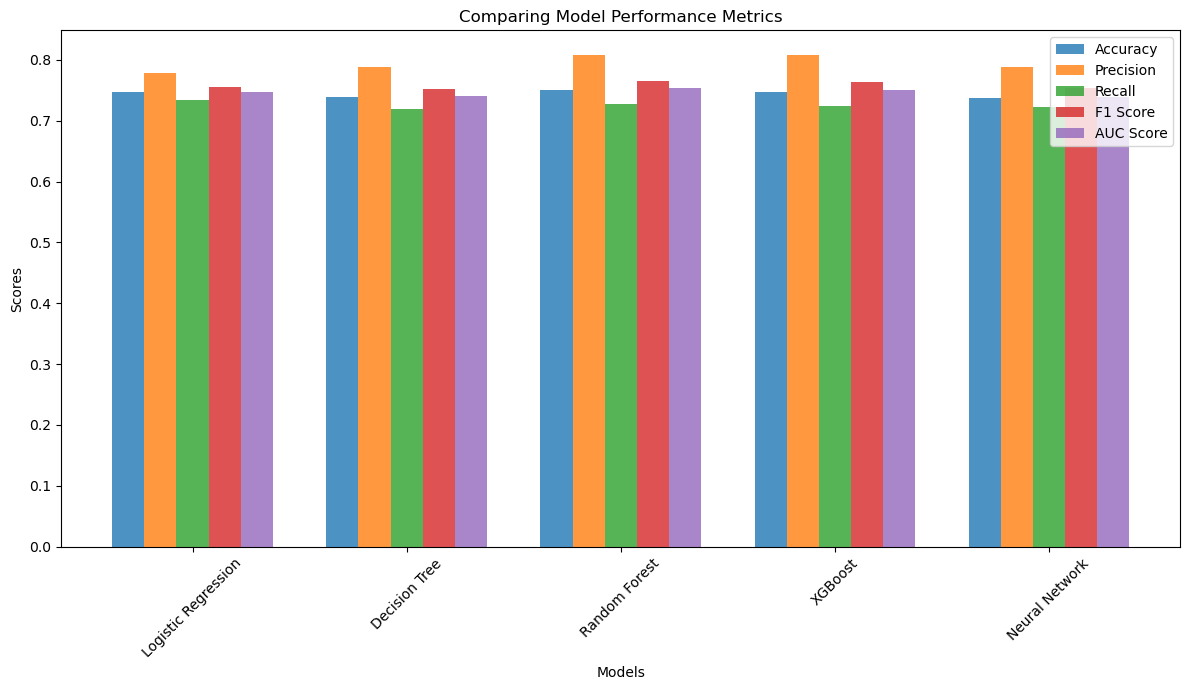

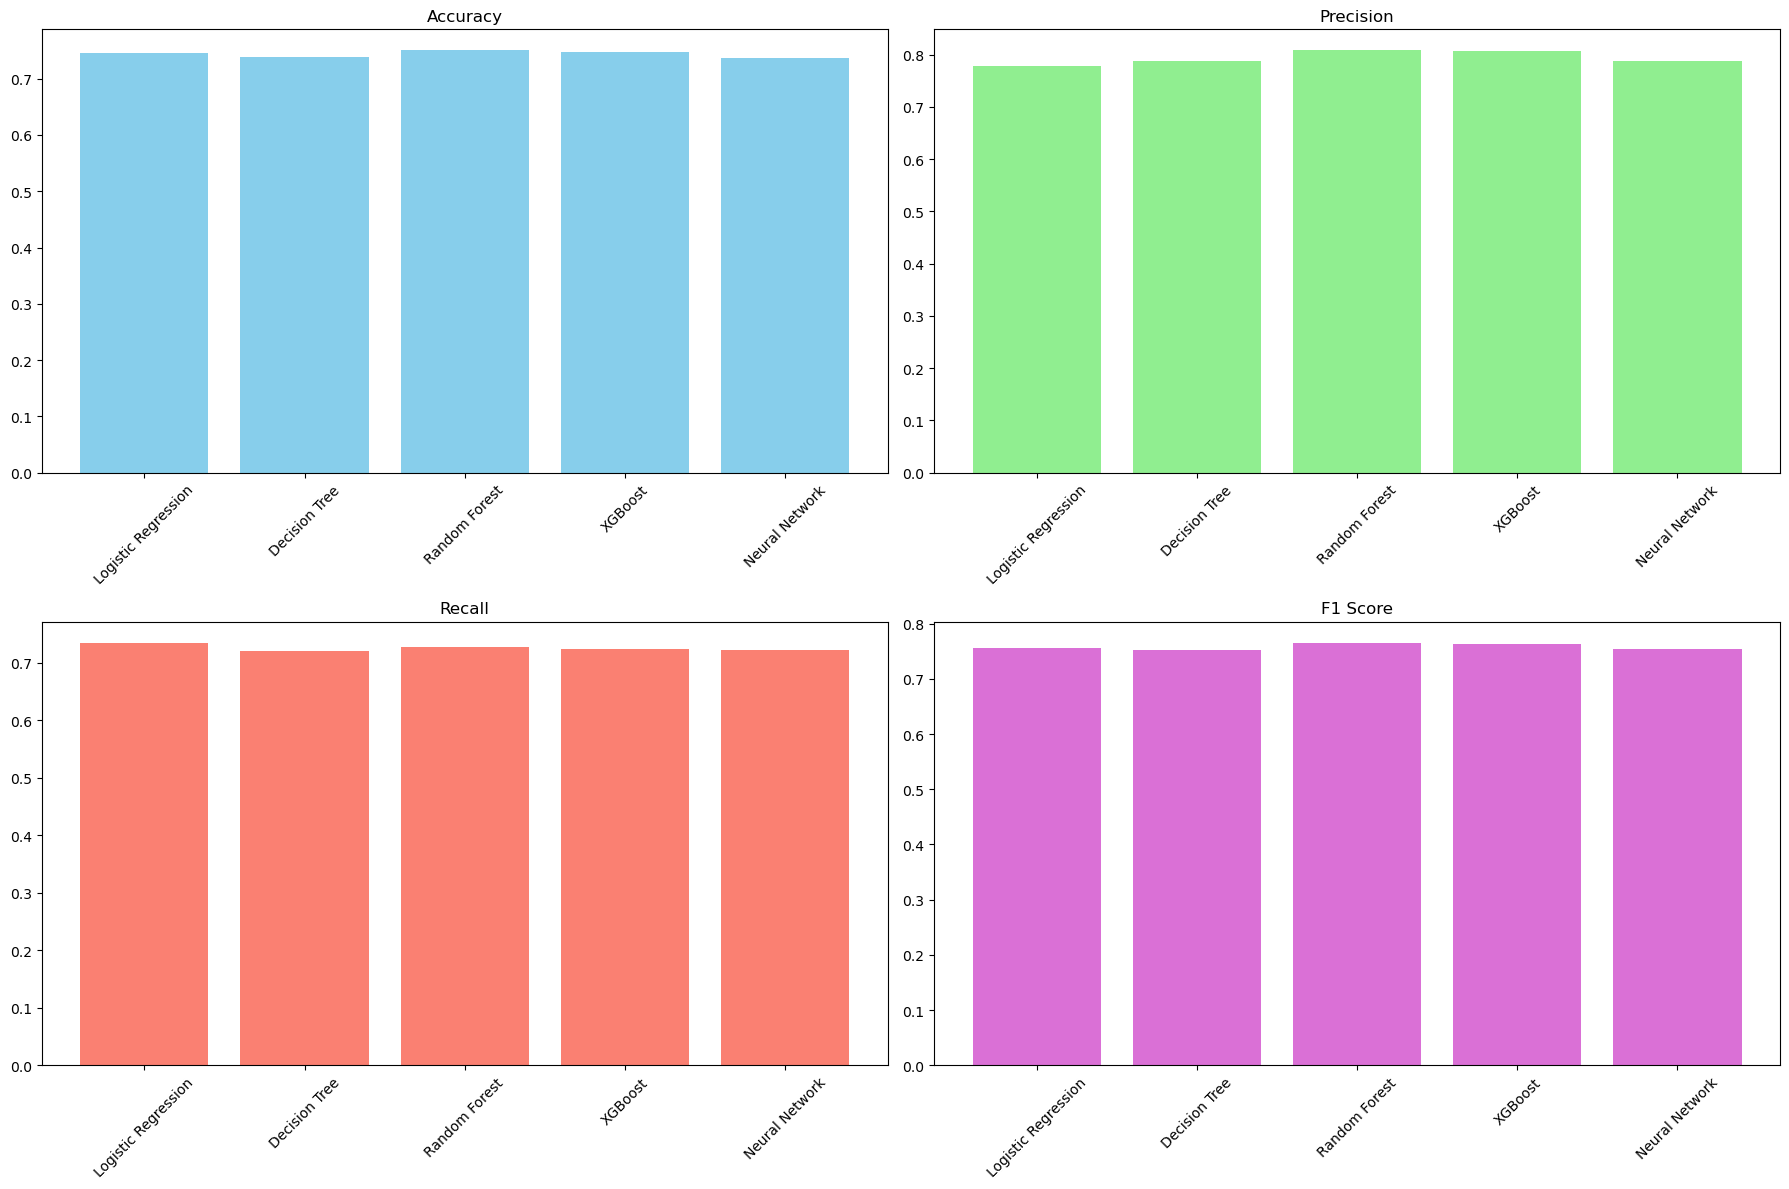

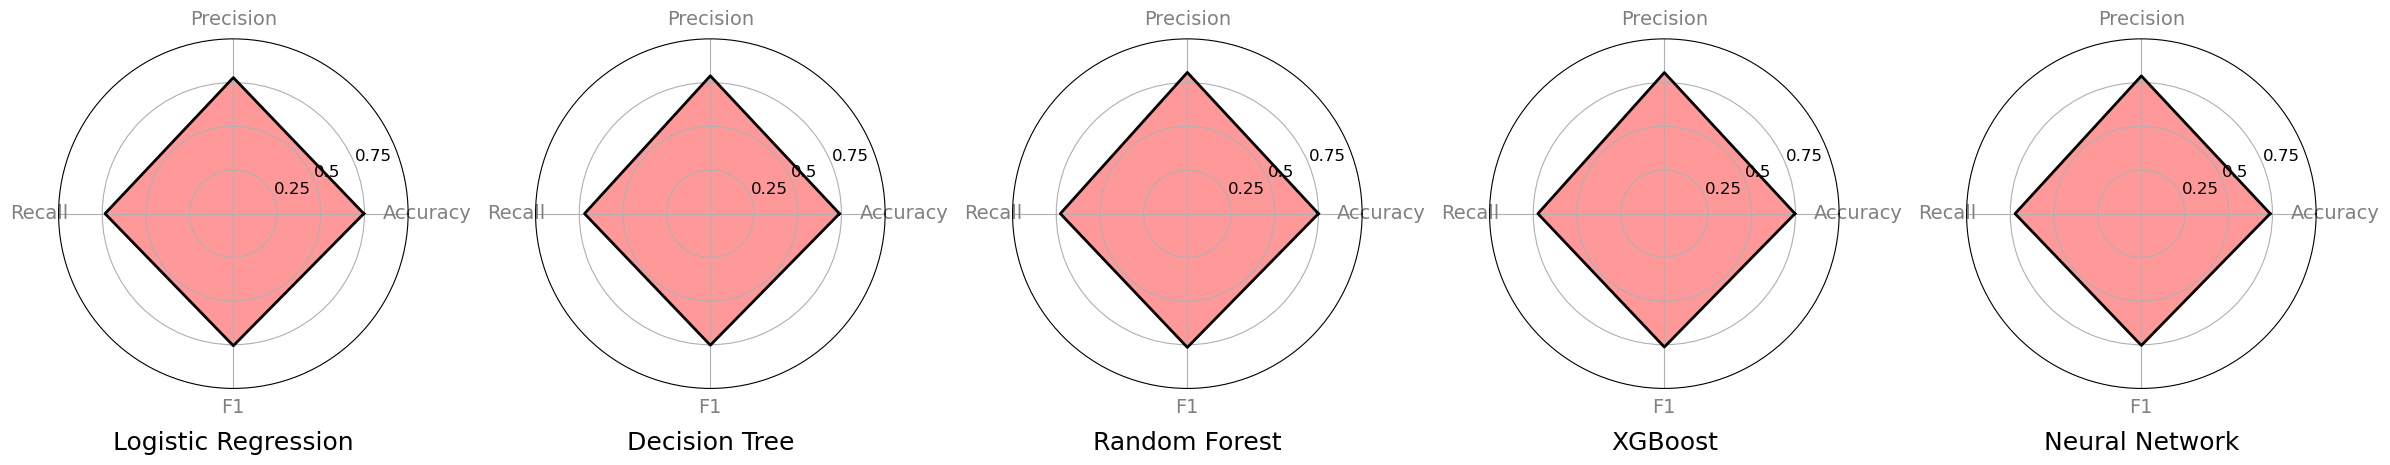

In [666]:
model_names = [
"Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"
]
accuracy_scores = [logistic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy, xgb_accuracy, nn_accuracy]
precision_scores = [logistic_regression_precision, decision_tree_precision, random_forest_precision, xgb_precision, nn_precision]
recall_scores = [logistic_regression_recall, decision_tree_recall, random_forest_recall, xgb_recall, nn_recall]
f1_scores = [logistic_regression_f1_score, decision_tree_f1_score, random_forest_f1_score, xgb_f1_score, nn_f1_score]
AUC_scores = [logistic_regression_auc_score, decision_tree_auc_score, random_forest_auc_score, xgb_auc_score, nn_auc_score]
fig, ax = plt.subplots(figsize=(12, 7))
index_1 = np.arange(len(model_names))
bar_width = 0.15
opacity = 0.8
bar1 = ax.bar(index_1 - bar_width*2, accuracy_scores, bar_width, alpha=opacity, label='Accuracy')
bar2 = ax.bar(index_1 - bar_width, precision_scores, bar_width, alpha=opacity, label='Precision')
bar3 = ax.bar(index_1, recall_scores, bar_width, alpha=opacity, label='Recall')
bar4 = ax.bar(index_1 + bar_width, f1_scores, bar_width, alpha=opacity, label='F1 Score')
bar5 = ax.bar(index_1 + bar_width*2, AUC_scores, bar_width, alpha=opacity, label='AUC Score')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparing Model Performance Metrics')
ax.set_xticks(index_1)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs[0, 0].bar(model_names, accuracy_scores, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].tick_params('x', rotation=45)
axs[0, 1].bar(model_names, precision_scores, color='lightgreen')
axs[0, 1].set_title('Precision')
axs[0, 1].tick_params('x', rotation=45)
axs[1, 0].bar(model_names, recall_scores, color='salmon')
axs[1, 0].set_title('Recall')
axs[1, 0].tick_params('x', rotation=45)
axs[1, 1].bar(model_names, f1_scores, color='orchid')
axs[1, 1].set_title('F1 Score')
axs[1, 1].tick_params('x', rotation=45)
plt.tight_layout()
plt.show()

model_metrics = {
'Logistic Regression': [logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall, logistic_regression_f1_score],
'Decision Tree': [decision_tree_accuracy, decision_tree_precision,  decision_tree_recall, decision_tree_f1_score],
'Random Forest': [random_forest_accuracy, random_forest_precision, random_forest_recall, random_forest_f1_score],
'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1_score],
'Neural Network': [nn_accuracy, nn_precision, nn_recall, nn_f1_score],
}
def plot_model_metrics(name, scores, position): 
    metrics_df = pd.DataFrame({
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
        'Scores': scores
    })
    metrics_count = len(metrics_df['Metrics'])
    angles = np.linspace(0, 2 * np.pi, metrics_count, endpoint=False).tolist()
    angles += angles[:1]
    ax = plt.subplot(2, 5, position, polar=True)
    plt.xticks(angles[:-1], metrics_df['Metrics'], color='gray', size=14)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="black", size=12)
    plt.ylim(0,1)
    scores += scores[:1]
    ax.plot(angles, scores, color='black', linewidth=2, linestyle='solid')
    ax.fill(angles, scores, color='red', alpha=0.4)
    plt.title(name, size=18, color='black', y=-0.2)
plt.figure(figsize=(24, 12))
chart_position = 1
for model, performance_scores in model_metrics.items():
    plot_model_metrics(model, performance_scores, chart_position)
    chart_position += 1
plt.tight_layout()
plt.show()

Accuracy is a metric used to measure how often the model correctly predicts the outcome; Acc = # Correct Predictions / # Total Predictions.

Precision: a metric which measures model performance in terms of quality; calculated as the ratio between the number of 'True Positives' and the sum of the number of 'True Positives' and the number of 'False Positives'; a high precision indicates that the model returns more relevant or 'precise' results than irrelevant ones.

Recall: a metric which measures model performance in terms of quantity; calculated as the ratio between the number of 'True Positives' and the sum of the number of 'True Positives' and the number of 'False Negatives'; a high recall indicates that the model returns most of the relevant results, regardless of how many irrelevant results are also returned.

F1-Score: measures predictive model performance by integrating precision and recall into a single metric; calculated as the harmonic mean of the precision and recall scores; ranges from 0 to 1, with 0 indicating poor performance and 1 indicating perfect performance.

AUC Score: stands for 'Area under the [ROC] curve'; the receiver operating characteristic[ROC] curve is a graph displaying the perfocemance of a classification model at all classification thresholds, plotting the true positive rate against the false positive rate; The AUC score summarizes this curve and measures the ability of the classifier to distinguish between positive and negative classes.

Based on the visualizations, model performance for all five algorithms was satisfactory and there was not much discrepancy in metrics between them.